# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

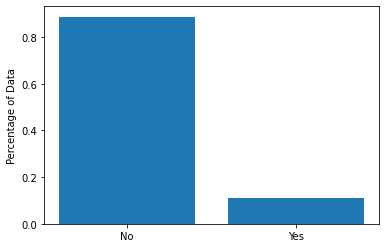

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

### Based on the visualization above, I found that that the sample data is imbalanced. I would resample it and apply SMOTE.

In [11]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

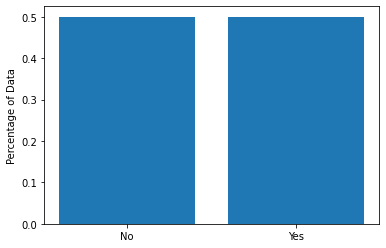

In [12]:
obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [13]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.142\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.499\ngini = 0.305\nsamples = 20538\nvalue = [16686, 3852]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.105\nsamples = 10350\nvalue = [9777, 573]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.089\nsamples = 10162\nvalue = [9688, 474]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.499\nsamples = 188\nvalue = [89, 99]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.437\nsamples = 10188\nvalue = [6909, 3279]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 7410\nvalue = [4235, 3175]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.072\nsamples = 2778\nvalue = [2674, 104]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.412\nsamples = 30622\nvalue = [8894, 21728]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.696\ngini = 0.332\nsamples = 25210\nvalue = [5309, 19901]\nclass 

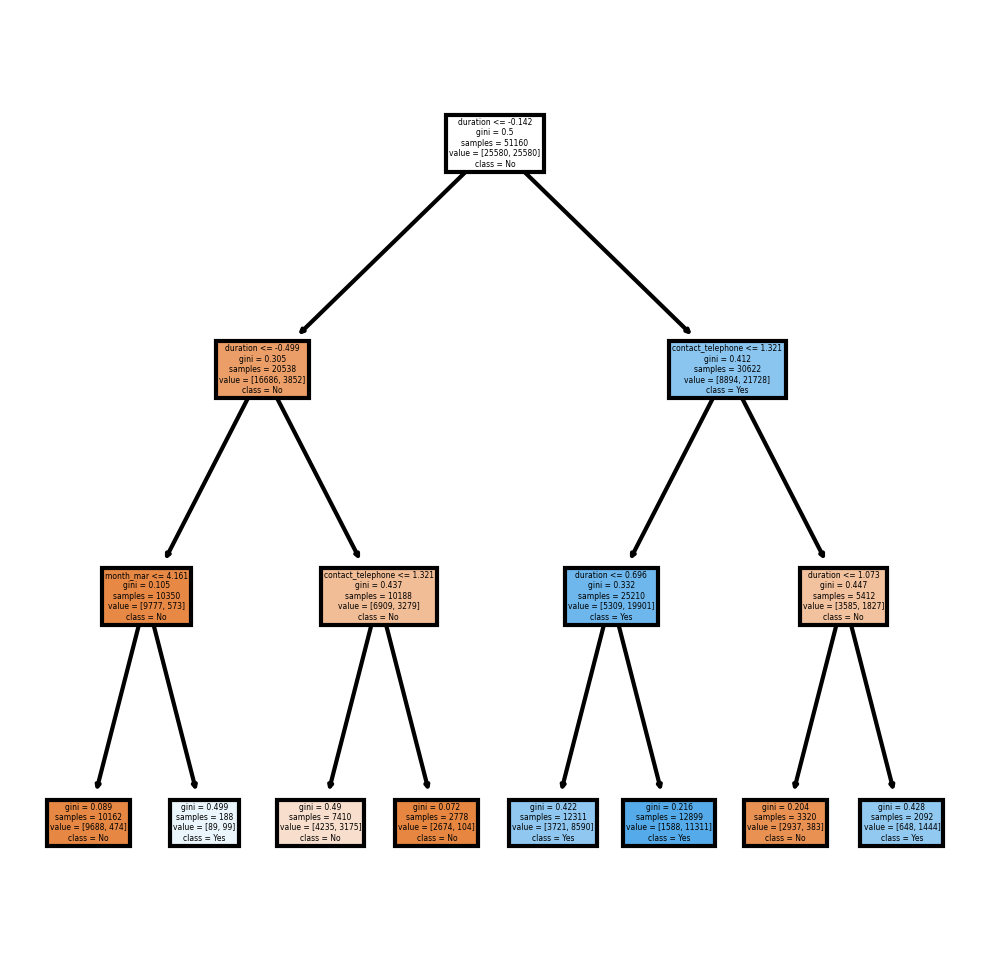

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [15]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

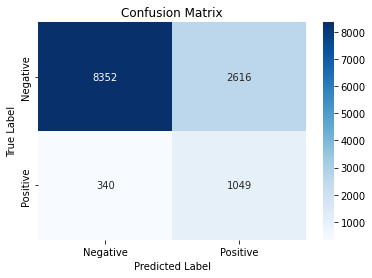

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [17]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7458930161042324


In [18]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

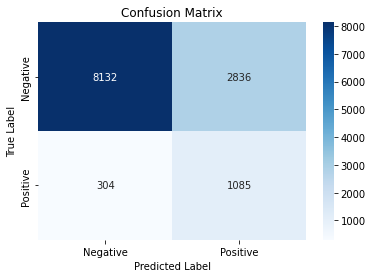

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

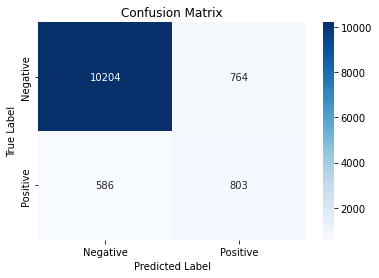

In [23]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [24]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 12.9 MB/s eta 0:00:00


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [26]:

### SET YOUR BASE LEARNERS
base_learners = [
    LogisticRegression(),
    LassoCV(),
    RandomForestClassifier(),
    DecisionTreeClassifier(max_depth = 3),
    AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)
]

super_learner = SuperLearner()
super_learner.add(base_learners)

### FIT TO TRAINING DATA

super_learner.fit(X_scaled, y_train)

### GET base_predictions

base_predictions = super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

In [27]:
### TRAIN YOUR METALEARNER

In [28]:
log_reg = LogisticRegression().fit(base_predictions, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
### INTERPRET COEFFICIENTS

In [30]:
log_reg.coef_

array([[ 1.66840388,  0.37325404,  0.40273457,  0.46290123, 13.70090227]])

### According to the output of the coefficient above, the fifth model has the largest coefficient. Therefore, the fifth model, the boosted decision tree model is the most important one. 

In [31]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
base_predictions

array([[ 0.        ,  0.        ,  0.6273554 ,  1.        ,  0.        ],
       [ 0.        ,  0.        , -0.02965092,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.0509446 ,  0.        ,  0.        ],
       ...,
       [ 1.        ,  1.        ,  0.52558553,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.7427746 ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.86729765,  1.        ,  1.        ]],
      dtype=float32)

In [32]:
y_pred = log_reg.predict(super_learner.predict(X_test))

In [33]:
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [34]:
cm_sl = confusion_matrix(y_true, y_pred)

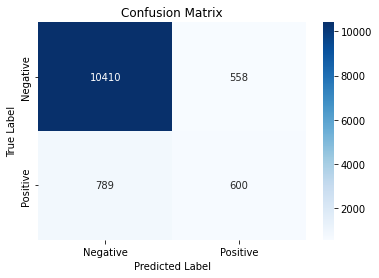

In [35]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_sl, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specificities(Out of Sample)

## Calculate Sensitivity (true positive rate) of decision tree, bagged, boosted and super learner.

In [40]:
# Sensitivity of desicion tree

sensitivity_raw = cm_raw[1,1]/(cm_raw[1,0]+cm_raw[1,1])

print('Sensitivity of Desicion tree : ', sensitivity_raw )

print("")
# Sensitivity of desicion tree (bagging)

sensitivity_bag = cm_bag[1,1]/(cm_bag[1,0]+cm_bag[1,1])

print('Sensitivity of Desicion tree (bagging) : ', sensitivity_bag )

print("")
# Sensitivity of desicion tree (boosting)

sensitivity_boosting = cm_boost[1,1]/(cm_boost[1,0]+cm_boost[1,1])

print('Sensitivity of Desicion tree (boosting) : ', sensitivity_boosting )

print("")
# Sensitivity of super learner

sensitivity_super_learner = cm_sl[1,1]/(cm_sl[1,0]+cm_sl[1,1])

print('Sensitivity of Super Learner : ', sensitivity_super_learner )

print("")

Sensitivity of Desicion tree :  0.7552195824334054

Sensitivity of Desicion tree (bagging) :  0.78113750899928

Sensitivity of Desicion tree (boosting) :  0.578113750899928

Sensitivity of Super Learner :  0.4319654427645788



## Bar chart of sensitivity of 4 models.

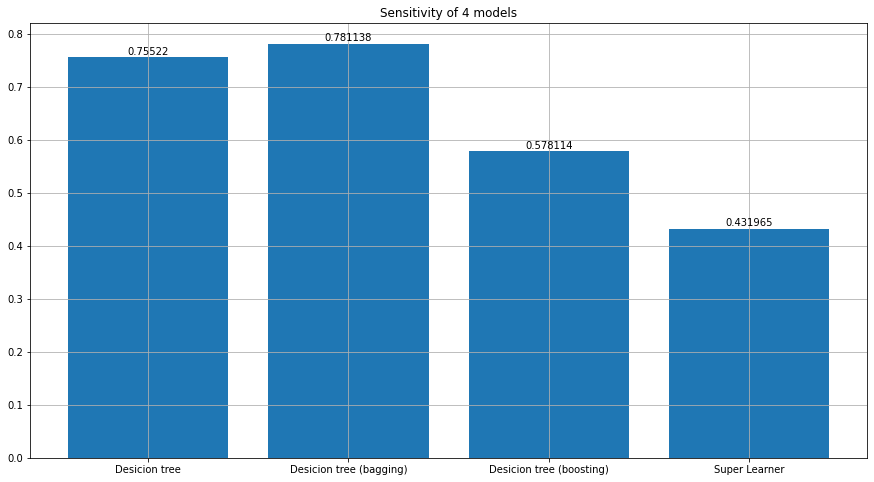

In [41]:
species = ('Desicion tree', 'Desicion tree (bagging)', 'Desicion tree (boosting)', 'Super Learner')
penguin_means = {
    'Sensitivity': (sensitivity_raw,sensitivity_bag,sensitivity_boosting,sensitivity_super_learner)
}

x = np.arange(len(species))
width = 0.8
multiplier = 0

fig, ax = plt.subplots(figsize = (15,8))

for attribute, measurement in penguin_means.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, measurement, width, label = attribute)
  ax.bar_label (rects, padding = 1)
  multiplier += 1

ax.set_label('Sensitivity')
ax.set_title('Sensitivity of 4 models')
ax.set_xticks(x, species)
ax.legend 
plt.grid()
plt.show()

## Calculate Specificity (true negativity rate) of decision tree, bagged, boosted and super learner.

In [38]:
# Specificity of desicion tree

specificity_raw = cm_raw[0,0]/(cm_raw[0,0]+cm_raw[0,1])

print('Specificity of Desicion tree : ', specificity_raw )

print("")
# Specificity of desicion tree (bagging)

specificity_bag = cm_bag[0,0]/(cm_bag[0,0]+cm_bag[0,1])

print('Specificity of Desicion tree (bagging) : ', specificity_bag )

print("")
# Specificity of desicion tree (boosting)

specificity_boosting = cm_boost[0,0]/(cm_boost[0,0]+cm_boost[0,1])

print('Specificity of Desicion tree (boosting) : ', specificity_boosting )

print("")
# Specificity of super learner

specificity_super_learner = cm_sl[0,0]/(cm_sl[0,0]+cm_sl[0,1])

print('Specificity of Super Learner : ', specificity_super_learner )

print("")

Specificity of Desicion tree :  0.7614879649890591

Specificity of Desicion tree (bagging) :  0.7414296134208607

Specificity of Desicion tree (boosting) :  0.9303428154631656

Specificity of Super Learner :  0.9491247264770241



## Bar chart of specificity of 4 models.

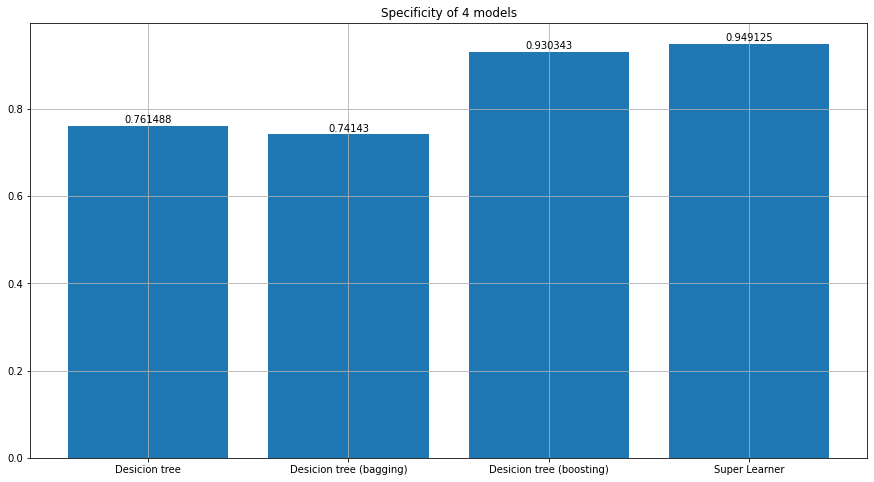

In [39]:
species = ('Desicion tree', 'Desicion tree (bagging)', 'Desicion tree (boosting)', 'Super Learner')
penguin_means = {
    'Specificity': (specificity_raw,specificity_bag,specificity_boosting,specificity_super_learner)
}

x = np.arange(len(species))
width = 0.8
multiplier = 0

fig, ax = plt.subplots(figsize = (15,8))

for attribute, measurement in penguin_means.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, measurement, width, label = attribute)
  ax.bar_label (rects, padding = 1)
  multiplier += 1

ax.set_label('Specificity')
ax.set_title('Specificity of 4 models')
ax.set_xticks(x, species)
ax.legend 
plt.grid()
plt.show()